# Edge vs. Cloud Computing Demonstration

Data processing is simulated from IoT devices, comparing the latency between traditional cloud computing and edge computing.

The code will generate data from IoT devices, process it locally (edge computing), and then send essential information to a central server (cloud computing).

In [ ]:
#Install required Libraries..

In [1]:
pip install simpy networkx matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Create a Python script that simulates both edge and cloud computing.

Measure and compare the latency in both scenarios.

# 1. Simulation Code

In [5]:
import simpy
import random

# Simulation parameters
NUM_DEVICES = 10  # Number of IoT devices
DATA_GENERATION_INTERVAL = 2  # Average time interval (seconds) between data generation from devices
EDGE_PROCESSING_TIME = 1  # Time (seconds) to process data at the edge server
CLOUD_PROCESSING_TIME = 5  # Time (seconds) to process data at the cloud server
SIMULATION_TIME = 100  # Total simulation time (seconds)

# Lists to store latency values for edge and cloud processing
latencies_edge = []
latencies_cloud = []

# Function to simulate data generation from an IoT device
def generate_data(env, device_id, edge_server, cloud_server):
    while True:
        # Generate data at random intervals based on an exponential distribution
        yield env.timeout(random.expovariate(1.0 / DATA_GENERATION_INTERVAL))
        data = f"Data from device {device_id}"
        print(f"{env.now}: Device {device_id} generated data")
        # Process the generated data at the edge server
        env.process(process_data_edge(env, data, edge_server, cloud_server))

# Function to simulate data processing at the edge server
def process_data_edge(env, data, edge_server, cloud_server):
    start_time = env.now  # Record the time when processing starts
    with edge_server.request() as request:
        yield request
        yield env.timeout(EDGE_PROCESSING_TIME)  # Simulate edge processing time
        edge_latency = env.now - start_time  # Calculate latency for edge processing
        latencies_edge.append(edge_latency)
        print(f"{env.now}: Edge processed data: {data}")
        # Process the data at the cloud server after edge processing
        env.process(process_data_cloud(env, data, cloud_server, start_time))

# Function to simulate data processing at the cloud server
def process_data_cloud(env, data, cloud_server, start_time):
    with cloud_server.request() as request:
        yield request
        yield env.timeout(CLOUD_PROCESSING_TIME)  # Simulate cloud processing time
        cloud_latency = env.now - start_time  # Calculate total latency (edge + cloud processing)
        latencies_cloud.append(cloud_latency)
        print(f"{env.now}: Cloud processed data: {data}")

# Main function to set up and run the simulation
def simulate():
    env = simpy.Environment()  # Create a simulation environment
    edge_server = simpy.Resource(env, capacity=NUM_DEVICES)  # Create an edge server with capacity for all devices
    cloud_server = simpy.Resource(env, capacity=NUM_DEVICES)  # Create a cloud server with capacity for all devices

    # Set up data generation processes for each IoT device
    for i in range(NUM_DEVICES):
        env.process(generate_data(env, i, edge_server, cloud_server))

    # Run the simulation for the specified duration
    env.run(until=SIMULATION_TIME)

if __name__ == "__main__":
    simulate()  # Run the simulation

    # Save the latency data for later use
    with open('latencies_edge.txt', 'w') as f:
        for item in latencies_edge:
            f.write("%s\n" % item)

    with open('latencies_cloud.txt', 'w') as f:
        for item in latencies_cloud:
            f.write("%s\n" % item)

0.36021541438426835: Device 1 generated data
1.0869336831928396: Device 8 generated data
1.2755393293563468: Device 6 generated data
1.3602154143842684: Edge processed data: Data from device 1
2.0869336831928393: Edge processed data: Data from device 8
2.1763447186722655: Device 9 generated data
2.275539329356347: Edge processed data: Data from device 6
2.440483218579868: Device 2 generated data
2.9196869688495415: Device 2 generated data
3.1763447186722655: Edge processed data: Data from device 9
3.208972558335598: Device 1 generated data
3.316456282846565: Device 2 generated data
3.35021712351671: Device 1 generated data
3.393910931991873: Device 8 generated data
3.440483218579868: Edge processed data: Data from device 2
3.4415336455309444: Device 1 generated data
3.5797734423381735: Device 5 generated data
3.9196869688495415: Edge processed data: Data from device 2
4.004594013614573: Device 0 generated data
4.2089725583355975: Edge processed data: Data from device 1
4.31645628284656

# Plotting Code

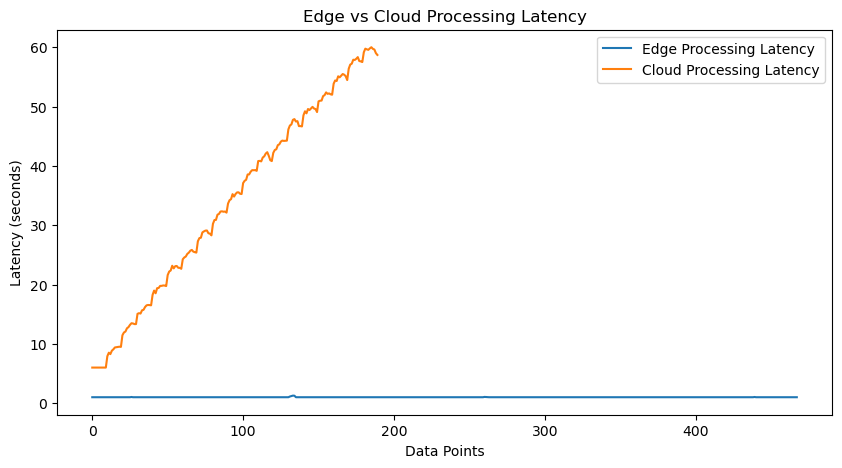

In [6]:
import matplotlib.pyplot as plt

# Load the latency data
latencies_edge = []
latencies_cloud = []

# Read the edge processing latencies from the file
with open('latencies_edge.txt', 'r') as f:
    latencies_edge = [float(line.strip()) for line in f]

# Read the cloud processing latencies from the file
with open('latencies_cloud.txt', 'r') as f:
    latencies_cloud = [float(line.strip()) for line in f]

# Plot the results
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the edge processing latencies
plt.plot(latencies_edge, label='Edge Processing Latency')

# Plot the cloud processing latencies
plt.plot(latencies_cloud, label='Cloud Processing Latency')

# Set the x-axis label
plt.xlabel('Data Points')

# Set the y-axis label
plt.ylabel('Latency (seconds)')

# Add a legend to differentiate the lines
plt.legend()

# Set the title of the plot
plt.title('Edge vs Cloud Processing Latency')

# Display the plot
plt.show()

# Explanation

The combination of simulation and visualization provided by the code offers a clear demonstration of how edge computing can significantly reduce latency, thereby improving the performance of real-time applications. This project underscores the importance of adopting edge computing to meet the growing demands for faster and more efficient data processing in various industries.